# Visualização de Dados e Informações - Prática #01

### Adinan Alves de Brito Filho
### Priscila Cristina de Souza Mizukami Rocha

In [1]:
#Importando pacotes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lê csv e transforma em um dataframe 
df = pd.read_csv('Vendas.csv',encoding='windows-1252')

In [3]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [5]:
# Corrigindo o tipo de dado de Row ID e Postal Code para string
df = df.astype({"Row ID": str, "Postal Code": str})

# Corrigindo o tipo de dado da feature Order Date para datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

## Questão 1

Segundo seu chefe, o pessoal de Vendas adora Excel. Assim, eles gostariam de receber um CSV para contrastar _Sales X Profit_ segmentado por _Region_, destacando qual a média de _Discount_ aplicado.

In [6]:
#Cria novo df apenas com as colunas que vamos precisar 
df_client = df.drop(columns=['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code','Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity'])

In [7]:
#Agrupa por região
df_geral = df.groupby('Region')[['Sales','Profit']].sum()
print(df_geral)

               Sales       Profit
Region                           
Central  501239.8908   39706.3625
East     678781.2400   91522.7800
South    391721.9050   46749.4303
West     725457.8245  108418.4489


In [8]:
#Cria um df pra cada região
df_central = df_client.loc[df['Region'] == 'Central']
df_east = df_client.loc[df['Region'] == 'East']
df_south = df_client.loc[df['Region'] == 'South']
df_west = df_client.loc[df['Region'] == 'West']

In [9]:
#Calcula média de disconto
mean_central = df_central['Discount'].mean()
mean_east = df_east['Discount'].mean()
mean_south = df_south['Discount'].mean()
mean_west = df_west['Discount'].mean()

In [10]:
#cria uma lista de médias
mediadis = [mean_central, mean_east, mean_south, mean_west]

In [11]:
#adc coluna das médias
df_geral['Discount_Media'] = mediadis
print(df_geral)

               Sales       Profit  Discount_Media
Region                                           
Central  501239.8908   39706.3625        0.240353
East     678781.2400   91522.7800        0.145365
South    391721.9050   46749.4303        0.147253
West     725457.8245  108418.4489        0.109335


In [12]:
#Exporta dados em um csv
df_geral.to_csv("Q1_vendas_regiao.csv")

## Questão 2

Já para o pessoal de marketing de produto, seu chefe indicou que eles gostariam de uma visão de _Profit_ acumulado por ano _(Order Date)_ para cada um das sub-categorias de produto _(Sub-Category)_. Marketing adora um gráfico de barras! Você pode usar a biblioteca _matplotlib_ ou _seaborn_.

In [13]:
# Criando a coluna Year a partir da coluna Order Date
df['Year'] = df['Order Date'].dt.year

In [14]:
# Agrupando os dados por 'Year' e 'Sub-Category' e somando a coluna 'Profit'
df_grouped_y_sc_p = df.groupby(['Year', 'Sub-Category'])['Profit'].sum().reset_index()

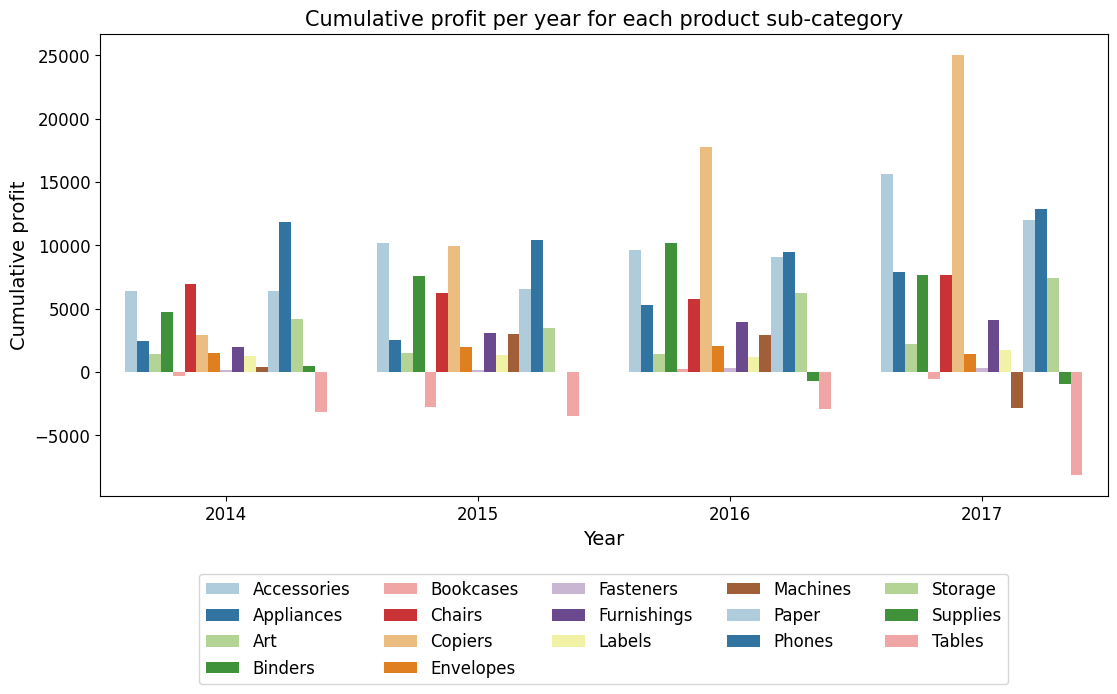

In [15]:
# Definindo o tamanho do gráfico
plt.figure(figsize=(13, 6))

# Criando o gráfico de barras
sns.barplot(x='Year', y='Profit', hue='Sub-Category', data=df_grouped_y_sc_p, palette="Paired")

# Definindo a posição da legenda para abaixo do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5, fontsize=12)

# Adicionando rótulos dos eixos e título, e plotando
plt.xlabel('Year', fontsize=14)
plt.ylabel('Cumulative profit', fontsize=14)
plt.title('Cumulative profit per year for each product sub-category', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig("Q2_lucro_acumulado_por_ano_sub_categoria.pdf", format="pdf", bbox_inches="tight")
plt.show()


## Questão 3

Por fim, o pessoal do financeiro gostaria de receber um CSV com a quantidade de consumidores por classe de performance das vendas e _Segment_ do consumidor. A classe é determinada a partir do resultado da expressão $\frac{\mathit{Profit}}{\mathit{Sales}-\mathit{Discount}}$ segundo a regra abaixo. Detalhe, o financeiro gostaria de algo bem enxuto onde eles pudessem ver as classes de performance por Segmento por coluna.

| **Classe** | **Valor de Performance** |
|------------|--------------------------|
| E          | [0,00 - 0,10]            |
| D          | (0,10 - 0,15]            |
| C          | (0,15 - 0,20]            |
| B          | (0,20 - 0,25]            |
| A          | (0,25 - 1,00]            |


In [16]:
# Funções para limpeza dos dados
def get_iqr_values(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25) # 25th percentile / 1st quartile
    q3 = df_in[col_name].quantile(0.75) # 7th percentile / 3rd quartile
    iqr = q3 - q1 # Interquartile range
    minimum = q1 - 1.5*iqr # The minimum value or the |- marker in the box plot
    maximum = q3 + 1.5*iqr # The maximum value or the -| marker in the box plot
    return minimum, maximum

def remove_outliers(df_in, cols):
    for col_name in cols:
        minimum, maximum = get_iqr_values(df_in, col_name)
        df_out = df_in.loc[(df_in[col_name] > minimum) & (df_in[col_name] < maximum)]
    return df_out

In [17]:
# Informações estatísticas dos atributos numéricos do dataframe importado
df.describe()

,Sales,Quantity,Discount,Profit,Year
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896,2015.722233
std,623.245101,2.225110,0.206452,234.260108,1.123555
min,0.444000,1.000000,0.000000,-6599.978000,2014.000000
25%,17.280000,2.000000,0.000000,1.728750,2015.000000
50%,54.490000,3.000000,0.200000,8.666500,2016.000000
75%,209.940000,5.000000,0.200000,29.364000,2017.000000
max,22638.480000,14.000000,0.800000,8399.976000,2017.000000


<Axes: >

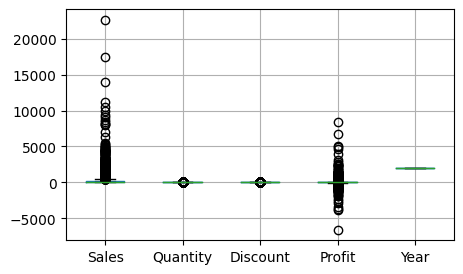

In [18]:
# Verificando a presença de outliers nos dados
df.boxplot(figsize=[5, 3])

<Axes: >

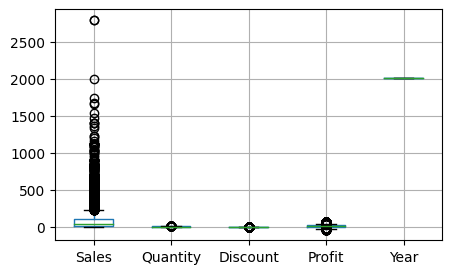

In [19]:
# Duplicando dataframe para preservar os dados originais e removendo outliers do dataframe cópia
df_clean = df.copy()
features_to_clean = ['Sales', 'Quantity', 'Discount', 'Profit']
df_clean = remove_outliers(df_clean, features_to_clean)
df_clean.boxplot(figsize=[5, 3])

In [20]:
# Calculando o Performance Value do dataframe sem outliers
df_clean["Performance Value"] = df_clean["Profit"]/(df_clean["Sales"]-df_clean["Discount"])
df_clean.describe()

,Sales,Quantity,Discount,Profit,Year,Performance Value
count,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000,8113.000000
mean,91.051345,3.550475,0.148920,11.604086,2015.726242,0.122635
std,156.189857,2.076080,0.197695,18.641425,1.124026,0.735270
min,0.444000,1.000000,0.000000,-39.637000,2014.000000,-37.155556
25%,13.970000,2.000000,0.000000,2.049200,2015.000000,0.076366
50%,35.440000,3.000000,0.200000,7.257600,2016.000000,0.280000
75%,99.870000,5.000000,0.200000,19.034400,2017.000000,0.375282
max,2803.920000,14.000000,0.800000,70.722000,2017.000000,3.873770


In [21]:
# Removendo entradas com Performance Value negativo e maior do que um
df_clean = df_clean.loc[(df_clean["Performance Value"] >= 0) & (df_clean["Performance Value"] <= 1)]
df_clean.describe()

,Sales,Quantity,Discount,Profit,Year,Performance Value
count,6846.000000,6846.000000,6846.000000,6846.000000,6846.000000,6846.000000
mean,89.844290,3.570698,0.086408,16.060162,2015.727286,0.292414
std,151.147753,2.083827,0.099922,16.307605,1.124782,0.145768
min,0.990000,1.000000,0.000000,0.000000,2014.000000,0.000000
25%,15.280000,2.000000,0.000000,4.280400,2015.000000,0.165015
50%,36.960000,3.000000,0.000000,9.681600,2016.000000,0.317913
75%,98.352000,5.000000,0.200000,22.237600,2017.000000,0.420000
max,2803.920000,14.000000,0.400000,70.722000,2017.000000,0.500000


In [22]:
# Criando a coluna Performance Class e classificando as entradas
df_clean.loc[(df_clean['Performance Value'] >= 0.0) & (df_clean['Performance Value'] <= 0.10), 'Performance Class'] = 'E'
df_clean.loc[(df_clean['Performance Value'] > 0.10) & (df_clean['Performance Value'] <= 0.15), 'Performance Class'] = 'D' 
df_clean.loc[(df_clean['Performance Value'] > 0.15) & (df_clean['Performance Value'] <= 0.20), 'Performance Class'] = 'C' 
df_clean.loc[(df_clean['Performance Value'] > 0.20) & (df_clean['Performance Value'] <= 0.25), 'Performance Class'] = 'B' 
df_clean.loc[(df_clean['Performance Value'] > 0.25), 'Performance Class'] = 'A'

In [23]:
# Verificando se a classificação foi correta
df_clean["Performance Class"].unique()

array(['C', 'A', 'D', 'E', 'B'], dtype=object)

In [24]:
# Agrupando por "Segment" e "Performance Class", contando o número de ocorrências e renomeando a coluna resultante
df_grouped_q3 = df_clean.groupby(["Performance Class", "Segment"])["Performance Class"].count().reset_index(name="Count")

# Ordenando pelo número de ocorrências em ordem decrescente
df_grouped_q3 = df_grouped_q3.sort_values(by=["Performance Class"], ascending=True)

# Visualizando resultado
df_grouped_q3

,Performance Class,Segment,Count
0,A,Consumer,2400
1,A,Corporate,1401
2,A,Home Office,846
3,B,Consumer,143
4,B,Corporate,86
5,B,Home Office,69
6,C,Consumer,136
7,C,Corporate,89
8,C,Home Office,50
9,D,Consumer,331


In [25]:
# Exportando dados extraídos para arquivo CSV
df_grouped_q3.to_csv("Q3_performance_class_segment.csv")